<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Procesamiento Digital de Señales

# Tarea Semanal Nº6
## Revisión: 0
#### Tobías Guerrero

In [11]:
# Librerías a utilizar
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [16]:
# Función para generar la señal, desarrollada en la TS1
def mifuncion( modo = "seno" , vmax = 1 , dc = 0 , ff = 1 , ph = 0 , nn = 1000 , fs = 1000 ):
    x = np.linspace(0 , (nn-1)/fs , nn) # Genero el array de tiempo
    if modo == "seno":
        y = dc + vmax * np.sin(2*np.pi*ff*x + ph) # Para generar la función senoidal utilizo la función provista por numpy
    elif modo == "cuadrada":
        y = dc + vmax * np.sign(np.sin(2*np.pi*ff*x + ph)) # Para generar una función cuadrada tomo el signo de la función seno
    elif modo == "diente":
        y = dc + 2 * vmax * (x * ff%1) - vmax # Para generar una función diente de sierra utilizo la fórmula de la recta que la representa. Al eje x lo escalo por la frecuencia para que se repita las veces que corresponda
    elif modo == "triangular":
        y = dc + 2 * vmax * (1 - np.abs((x * ff%1) - 0.5) * 2) - vmax ## Para generar una función triangular utilizo la fórmula que la representa. Al eje x lo escalo por la frecuencia para que se repita las veces que corresponda
    return x,y

In [17]:
# Variables para la generación de la señal
modo = "seno"
nn = 1000
fs = nn

## Generación de las señales para SNRs de 3 y 10dB

In [42]:
omega = nn / 4
a = 2
realizaciones = 200
snr1 = 10 # dB

# Cálculo de la potencia de ruido a partir de la SNR
Ps = (a**2) / 2
Pr = Ps / 10**(snr1/10)

# Se genera una matriz de 200 vectores de 1000 muestras
s1 = np.zeros((realizaciones,nn))

In [57]:
# Bucle para generar las 200 realizaciones
for i in range(realizaciones):
    fr = np.random.uniform(-0.5 , 0.5) * fs / nn
    t , sr = mifuncion( modo = modo , vmax = a , ff = omega + fr , nn = nn , fs = fs )
    r = np.random.normal(0, Pr, nn)
    s1[i] = sr + r

In [25]:
# Se repite el proceso para una SNR = 3dB
snr2 = 3 # dB

Pr = Ps / 10**(snr2/10)

s2 = np.zeros((realizaciones,nn))

for i in range(realizaciones):
    fr = np.random.uniform(-0.5 , 0.5) * fs / nn
    t , sr = mifuncion( modo = modo , vmax = a , ff = omega + fr , nn = nn , fs = fs )
    r = np.random.normal(0, Pr, nn)
    s2[i] = sr + r

## Ventana Rectangular

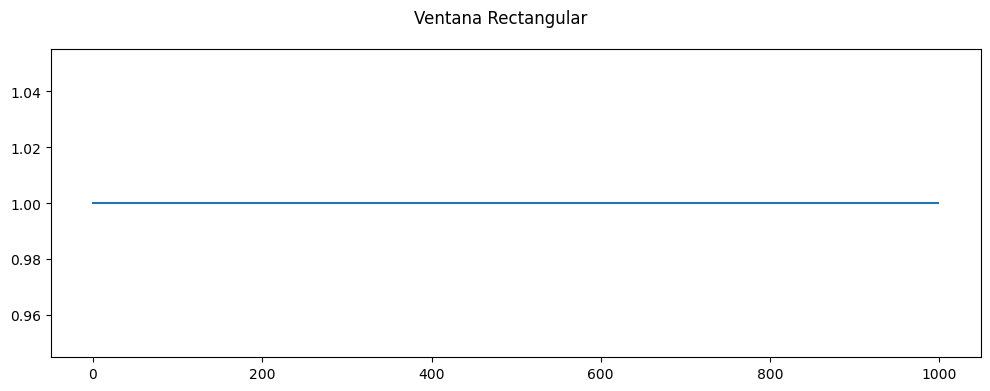

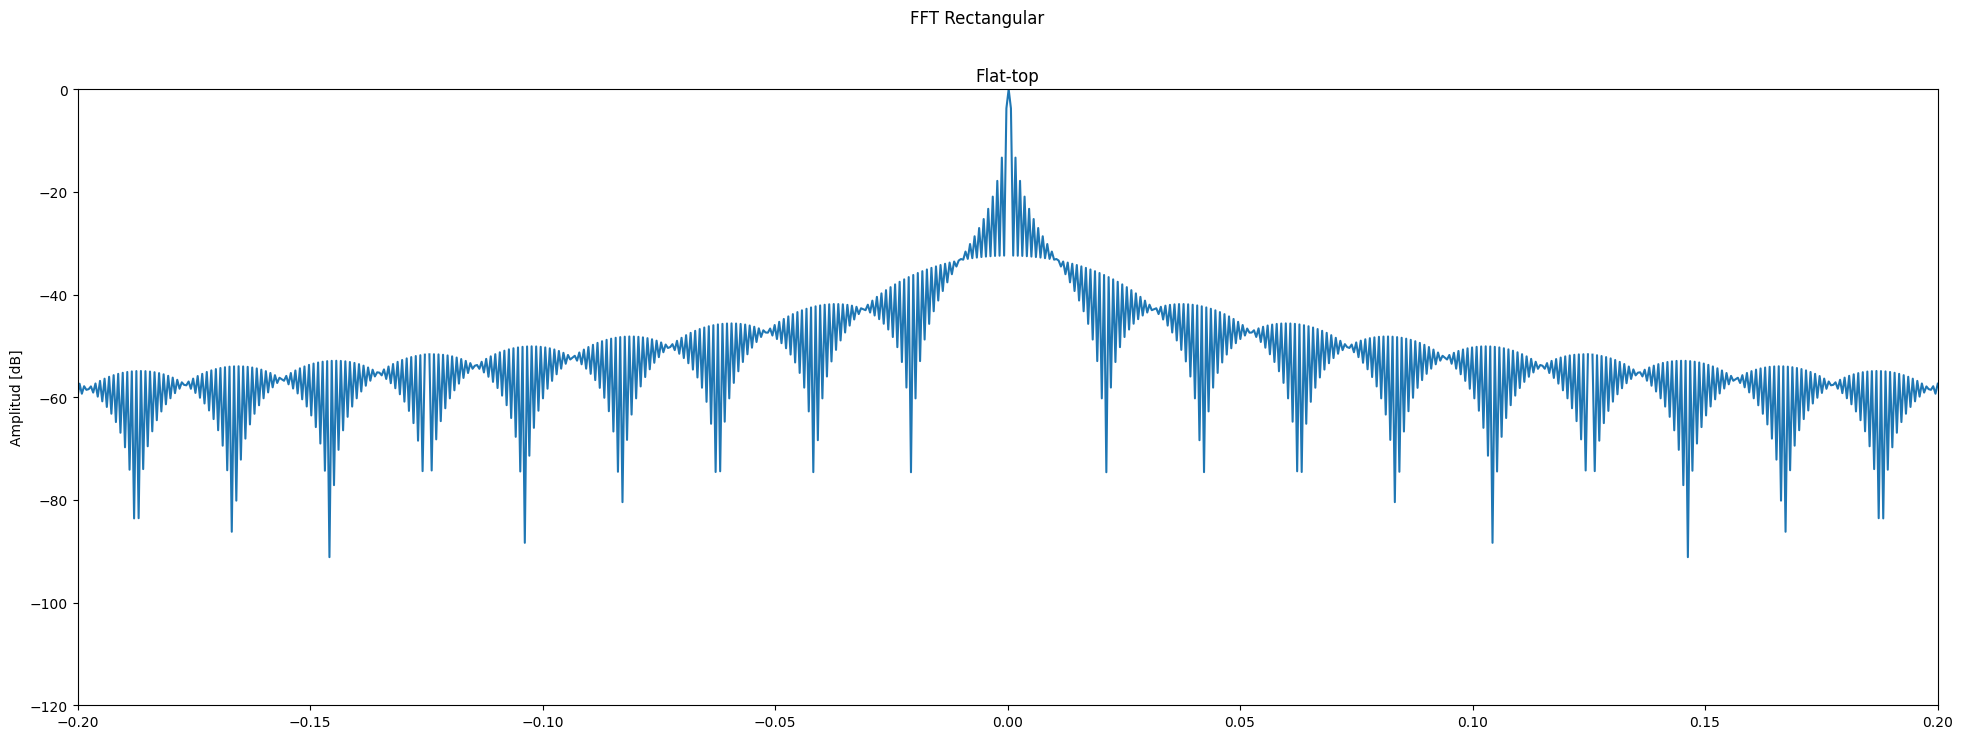

In [67]:
rectangular = signal.windows.boxcar(nn) # Rectangular

fig_hist, axs_hist = plt.subplots(1, 1, figsize=(12, 4), sharex=True, sharey=True)
axs_hist.plot(rectangular)
fig_hist.suptitle("Ventana Rectangular")
plt.show()

# Ploteo de la FFT de las ventanas
fig_fft, axs_fft = plt.subplots(1, 1, figsize=(24, 8), sharex=True, sharey=True)

# De la documentacion de scipy.signal.windows:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.windows.blackmanharris.html#scipy.signal.windows.blackmanharris
A = sp.fft.fft(rectangular, 2048) / (len(rectangular) / 2.0)
freq = np.linspace(-0.5, 0.5, len(A))
rect_dB = 20 * np.log10(np.abs(sp.fft.fftshift(A) / np.max(np.abs(A))))

axs_fft.plot(freq, rect_dB)
axs_fft.set_title(name)
axs_fft.set_ylim([-120, 0])
axs_fft.set_xlim([-0.2, 0.2])

axs_fft.set_ylabel("Amplitud [dB]")
plt.suptitle("FFT Rectangular")
plt.show()

In [60]:
S1 = np.fft.fft(s1*rectangular) / nn
S2 = np.fft.fft(s2*rectangular) / nn

In [47]:
a1_est = np.abs(S1[: , nn//4])
a2_est = np.abs(S2[: , nn//4])
print(np.mean(a1_est))
print(np.mean(a2_est))

0.8727187503886795
0.8655958228254641


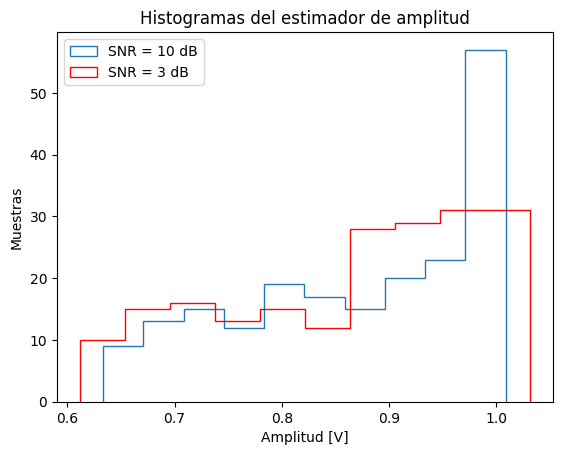

In [48]:
# Gráficos
plt.figure()
plt.title("Histogramas del estimador de amplitud")
plt.xlabel("Amplitud [V]")
plt.ylabel("Muestras")
plt.hist(a1_est, bins = 10, histtype = 'step',label = 'SNR = 10 dB')
plt.hist(a2_est, bins = 10, histtype = 'step',color = 'red',label = 'SNR = 3 dB')
plt.legend(loc='upper left')

## Ventana Bartlett

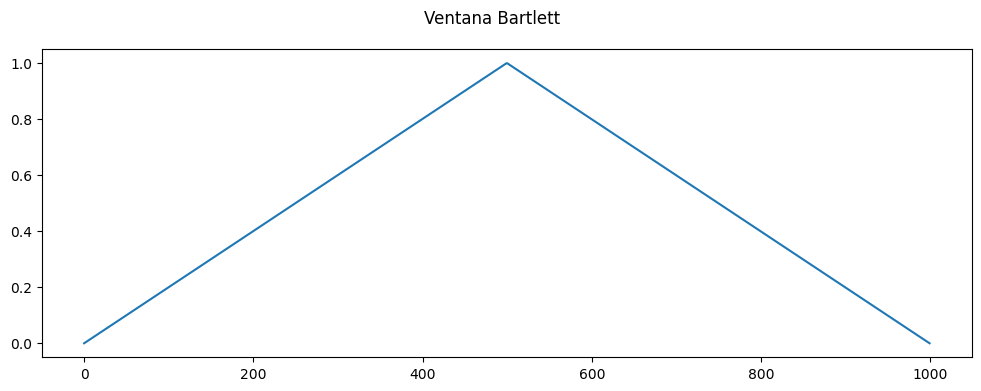

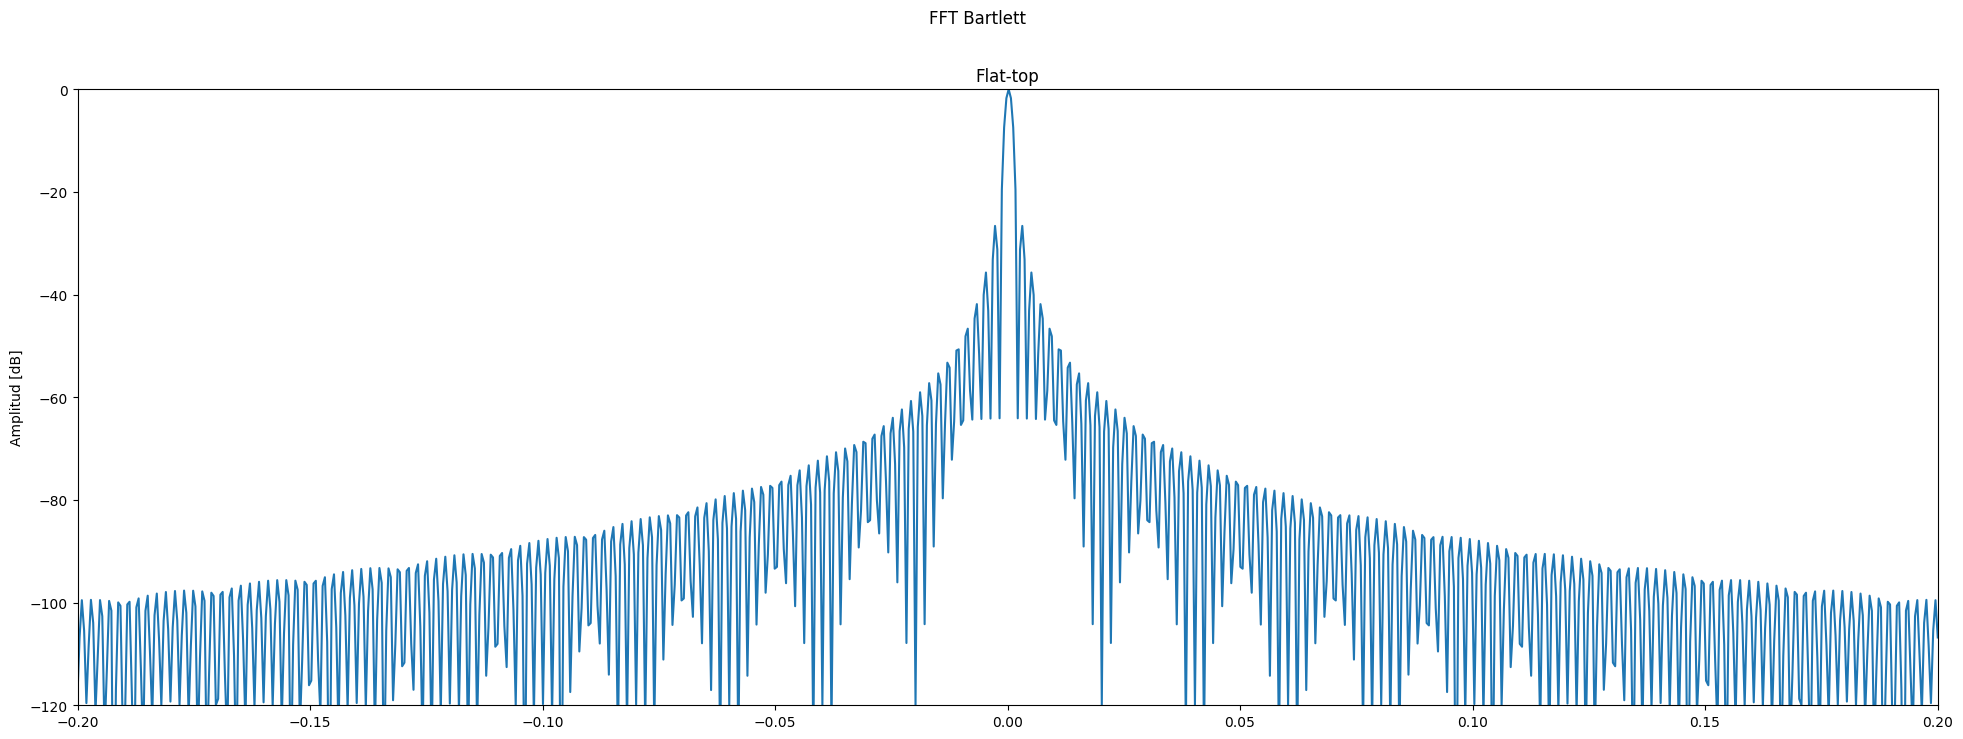

In [69]:
bartlett = signal.windows.bartlett(nn) # Rectangular

fig_hist, axs_hist = plt.subplots(1, 1, figsize=(12, 4), sharex=True, sharey=True)
axs_hist.plot(bartlett)
fig_hist.suptitle("Ventana Bartlett")
plt.show()

# Ploteo de la FFT de las ventanas
fig_fft, axs_fft = plt.subplots(1, 1, figsize=(24, 8), sharex=True, sharey=True)

# De la documentacion de scipy.signal.windows:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.windows.blackmanharris.html#scipy.signal.windows.blackmanharris
A = sp.fft.fft(bartlett, 2048) / (len(bartlett) / 2.0)
freq = np.linspace(-0.5, 0.5, len(A))
bart_dB = 20 * np.log10(np.abs(sp.fft.fftshift(A) / np.max(np.abs(A))))

axs_fft.plot(freq, bart_dB)
axs_fft.set_title(name)
axs_fft.set_ylim([-120, 0])
axs_fft.set_xlim([-0.2, 0.2])

axs_fft.set_ylabel("Amplitud [dB]")
plt.suptitle("FFT Bartlett")
plt.show()

0.46635599113674187
0.46487514189234963


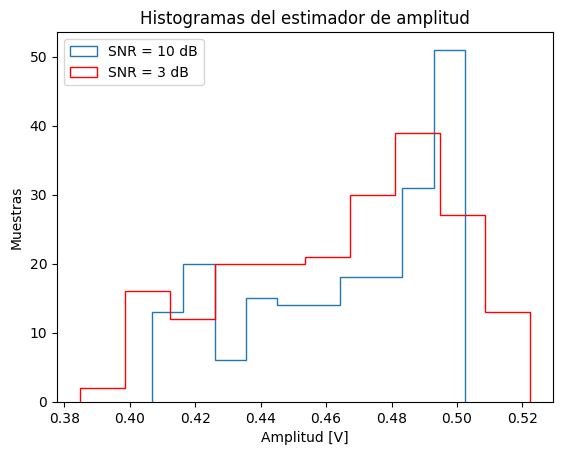

In [59]:
S1 = np.fft.fft(s1*bartlett) / nn
S2 = np.fft.fft(s2*bartlett) / nn

a1_est = np.abs(S1[: , nn//4])
a2_est = np.abs(S2[: , nn//4])
print(np.mean(a1_est))
print(np.mean(a2_est))

# Gráficos
plt.figure()
plt.title("Histogramas del estimador de amplitud")
plt.xlabel("Amplitud [V]")
plt.ylabel("Muestras")
plt.hist(a1_est, bins = 10, histtype = 'step',label = 'SNR = 10 dB')
plt.hist(a2_est, bins = 10, histtype = 'step',color = 'red',label = 'SNR = 3 dB')
plt.legend(loc='upper left')

## Ventana Blackman

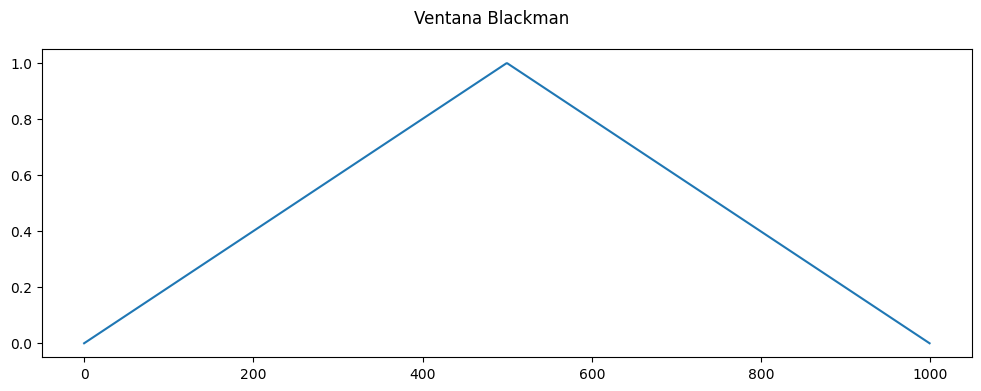

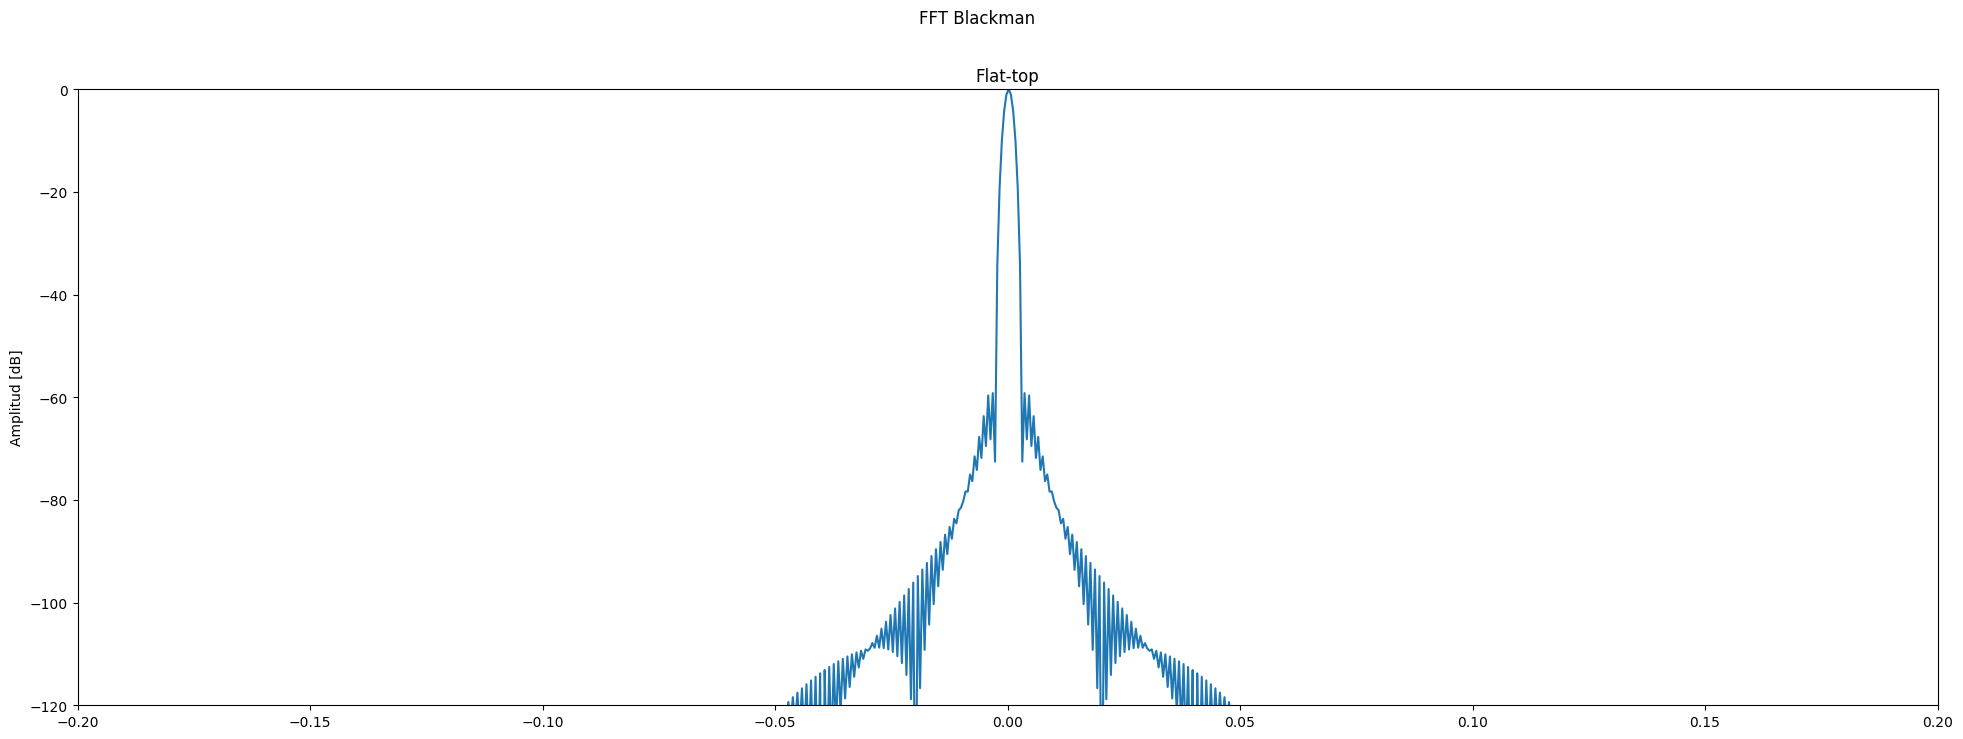

In [70]:
blackman = signal.windows.blackman(nn) # Rectangular

fig_hist, axs_hist = plt.subplots(1, 1, figsize=(12, 4), sharex=True, sharey=True)
axs_hist.plot(bartlett)
fig_hist.suptitle("Ventana Blackman")
plt.show()

# Ploteo de la FFT de las ventanas
fig_fft, axs_fft = plt.subplots(1, 1, figsize=(24, 8), sharex=True, sharey=True)

# De la documentacion de scipy.signal.windows:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.windows.blackmanharris.html#scipy.signal.windows.blackmanharris
A = sp.fft.fft(blackman, 2048) / (len(blackman) / 2.0)
freq = np.linspace(-0.5, 0.5, len(A))
black_dB = 20 * np.log10(np.abs(sp.fft.fftshift(A) / np.max(np.abs(A))))

axs_fft.plot(freq, black_dB)
axs_fft.set_title(name)
axs_fft.set_ylim([-120, 0])
axs_fft.set_xlim([-0.2, 0.2])

axs_fft.set_ylabel("Amplitud [dB]")
plt.suptitle("FFT Blackman")
plt.show()

0.40236125869324096
0.4012796844514698


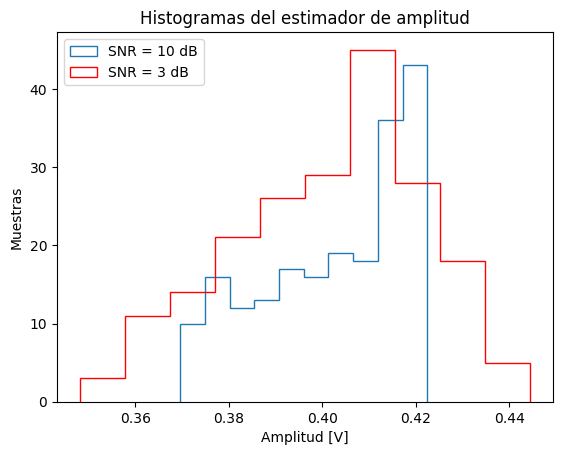

In [62]:
S1 = np.fft.fft(s1*blackman) / nn
S2 = np.fft.fft(s2*blackman) / nn

a1_est = np.abs(S1[: , nn//4])
a2_est = np.abs(S2[: , nn//4])
print(np.mean(a1_est))
print(np.mean(a2_est))

# Gráficos
plt.figure()
plt.title("Histogramas del estimador de amplitud")
plt.xlabel("Amplitud [V]")
plt.ylabel("Muestras")
plt.hist(a1_est, bins = 10, histtype = 'step',label = 'SNR = 10 dB')
plt.hist(a2_est, bins = 10, histtype = 'step',color = 'red',label = 'SNR = 3 dB')
plt.legend(loc='upper left')